In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

- Songs come up multiple times on the charts, not unique; maybe consider only peak position?
- If want to predict if song will be on top charts, also need data from songs not on top charts; problematic bc so many songs not on charts, there probably isn't a way to conclusively tell which songs will make it and which wont with so few features

In [2]:
data = pd.read_csv("C:\\Users\\chris\\Documents\\GitHub\\Crescendo\\data\\topCharts.csv")

data = data.drop(columns = ["Unnamed: 0", "Id"], axis = 1)

In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"].head()

0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: Date, dtype: datetime64[ns]

In [22]:
print(data.columns)
# print(data.shape)
# print(data.head())
# print(data.info())

Index(['Artist', 'Title', 'Rank', 'Streams', 'Date', 'Duration',
       'Time Signature', 'Tempo', 'Key', 'Mode', 'Valence', 'Danceability',
       'Energy', 'Acousticness', 'Instrumentalness'],
      dtype='object')


In [5]:
cnt_artist = Counter(data["Artist"])
for k,v in cnt_artist.most_common(20):
    print(f"{k}: {v}")

Post Malone: 8064
XXXTENTACION: 5948
Billie Eilish: 4636
Juice WRLD: 4165
Khalid: 3864
Drake: 3811
Ariana Grande: 3081
Travis Scott: 3026
Lil Baby: 2117
Cardi B: 2041
Lil Uzi Vert: 1978
Lil Skies: 1850
Marshmello: 1704
Migos: 1676
Kendrick Lamar: 1644
Trippie Redd: 1527
Ed Sheeran: 1457
J. Cole: 1438
Kodak Black: 1407
Luke Combs: 1396


In [6]:
cnt_titles = Counter(data["Title"]) # number of days each song has been on top charts
print(cnt_titles.most_common(20))

[('I Fall Apart', 756), ('Jocelyn Flores', 756), ('XO Tour Llif3', 750), ('goosebumps', 742), ('Fuck Love (feat. Trippie Redd)', 737), ('Congratulations', 702), ('SAD!', 698), ('I Like Me Better', 691), ('Moonlight', 676), ('Ric Flair Drip (& Metro Boomin)', 652), ('Meant to Be (feat. Florida Georgia Line)', 651), ('HUMBLE.', 645), ('All Girls Are The Same', 642), ('rockstar (feat. 21 Savage)', 641), ('Better Now', 640), ('Lucid Dreams', 632), ('Tequila', 629), ("God's Plan", 626), ('Location', 622), ('Young Dumb & Broke', 615)]


In [7]:
def plotRanks(artist, songs = [], top = 3):
    cnt_songs = Counter(data[data["Artist"] == artist]["Title"])
    top = min(top, len(cnt_songs.keys())) #make sure enough songs to plot
        
    if songs == []:
        songs = [song[0] for song in cnt_songs.most_common(top)]
        
    for song in songs:
        date_temp = data[(data["Artist"] == artist) & (data["Title"] == song)]["Date"]
        rank_temp = data[(data["Artist"] == artist) & (data["Title"] == song)]["Rank"]
        plt.plot(date_temp, rank_temp, label = song)
        
    plt.gca().invert_yaxis()
    plt.xlabel("Date")
    plt.ylabel("Rank")
    plt.title(f"{artist}: Song Ranks")
    plt.legend(prop = fontP)
    plt.xticks(rotation = 90)
    plt.show()

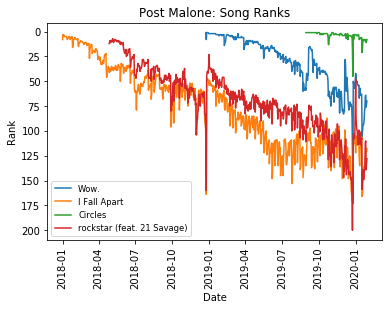

In [18]:
plotRanks("Post Malone", songs = ["Wow.", "I Fall Apart", "Circles", "rockstar (feat. 21 Savage)"])

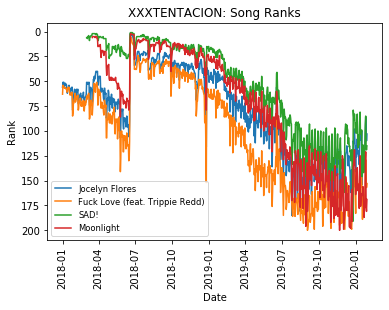

In [19]:
plotRanks("XXXTENTACION", top = 4)

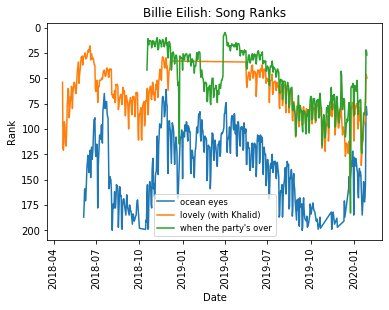

In [9]:
plotRanks("Billie Eilish")

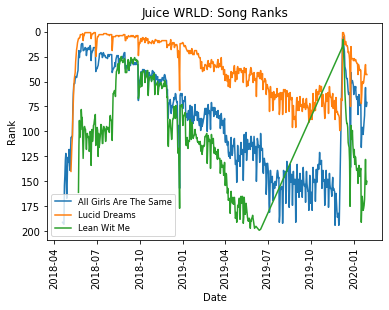

In [10]:
plotRanks("Juice WRLD")

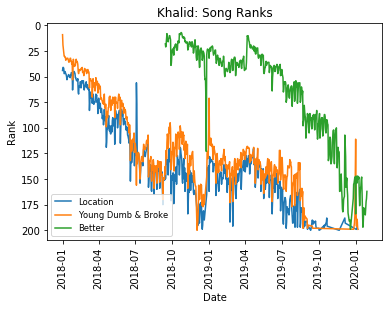

In [11]:
plotRanks("Khalid")

In [12]:
print(len(data["Artist"].unique())) # number of unique artists

645


In [13]:
print(len(data["Title"].unique()))  # number of unique songs

3351


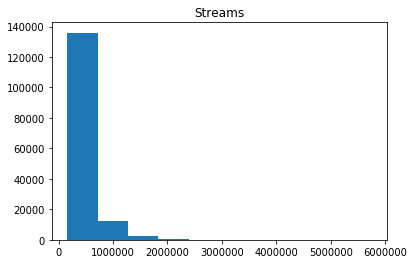

Streams avg: 415678.45819618605
Streams std : 298482.8931544895


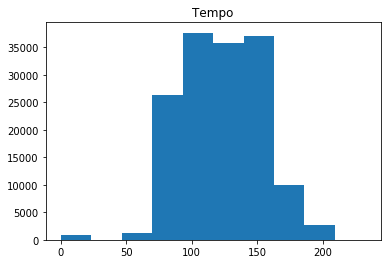

Tempo avg: 121.96812479469786
Tempo std : 31.18754793345674


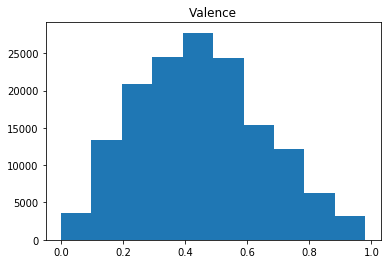

Valence avg: 0.4484337946319743
Valence std : 0.20386842062066612


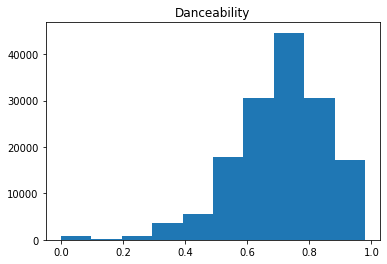

Danceability avg: 0.7072671222485257
Danceability std : 0.14903190920447787


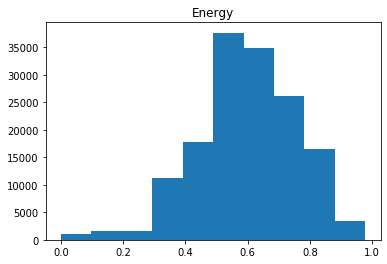

Energy avg: 0.5995248019471124
Energy std : 0.15910548016004053


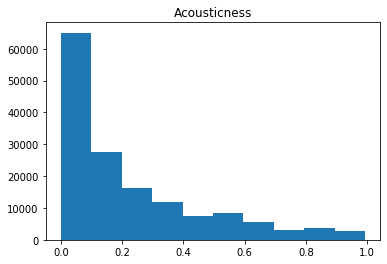

Acousticness avg: 0.2245444768385201
Acousticness std : 0.23718180837618927


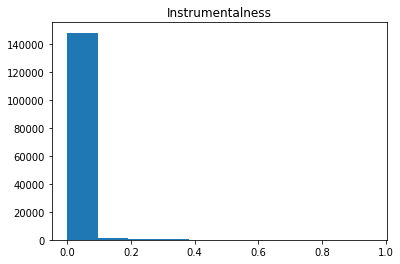

Instrumentalness avg: 0.006963270127109844
Instrumentalness std : 0.04941202819625701


In [21]:
for col in ("Streams", "Tempo", "Valence", "Danceability", "Energy", "Acousticness", "Instrumentalness"):
    plt.hist(data[col])
    plt.title(col)
    plt.show()
    print(f"{col} avg: {np.mean(data[col])}")
    print(f"{col} std : {np.std(data[col])}")

In [ ]:
plt.hist(np.log(data["Streams"]))
plt.title("Log streams")
plt.show()

__Tempo__: 	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

__Valence__: 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

__Danceabiity__: 	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

__Energy__: 	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

__Acousticness__: 	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

__Instrumentalness__: 	Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

In [ ]:
for col in ['Time Signature', 'Key', 'Mode']:
    cnt_temp = Counter(data[col])
    k = list(cnt_temp.keys())
    plt.bar(range(len(k)), list(cnt_temp.values()))
    plt.xticks(range(len(k)), k)
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.show()

In [ ]:
# ranks = dict()

# #Structure: {
# #            artist:{ 
# #                  song1:{ 
# #                        (first appearance date, [ranks])
# #                       }
# #                  song2:{
# #                        (first appearance date, [ranks])
# #                        }
# #                   }
# #            }

# for i in range(data.shape[0]):
#     artist,title,rank,date = data.iloc[i, [0,1,2,4]]
#     if artist not in ranks:                #no artist, title,date, rank
#         ranks[artist] = {title: (date, [rank])}
#     elif title not in ranks[artist]:       #no title, date, rank
#         ranks[artist][title] = (date, [rank])
#     else:                                  #if has title, then must have date, so just append rank
#         ranks[artist][title][1].append(rank)

# print(ranks)

In [ ]:
# def getDates(artist, songs):
#     dates = {}
#     artist_songs = ranks[artist]
#     for song in songs:
#         ds = [artist_songs[song][0]]
#         for _ in range(1, len(artist_songs[song][1])):
#             ds.append(ds[len(ds)-1] + timedelta(days = 1))
#         dates[song] = ds
#     return dates

In [ ]:
# dates_pm = getDates("Post Malone", ['rockstar', 'I Fall Apart', 'Congratulations',  'Sunflower - Spider-Man: Into the Spider-Verse', 'Wow.'])

# for song in dates_pm.keys():
#     if song == 'Sunflower - Spider-Man: Into the Spider-Verse':
#         plt.plot(dates_pm[song], ranks["Post Malone"][song][1], label = "Sunflower")
#     else:
#         plt.plot(dates_pm[song], ranks["Post Malone"][song][1], label = song)

    
# plt.gca().invert_yaxis()
# plt.xlabel("Date")
# plt.ylabel("Rank")
# plt.title("Post Malone: Rank Trends")
# plt.xticks(rotation = 90)
# plt.legend(prop = fontP)
# plt.show()

In [ ]:
# dates_xt = getDates("XXXTENTACION", ["Jocelyn Flores", "SAD!", "Moonlight"])

# for song in dates_xt.keys():
#     plt.plot(dates_xt[song], ranks["XXXTENTACION"][song][1], label = song)

# plt.gca().invert_yaxis()
# plt.xlabel("Date")
# plt.ylabel("Rank")
# plt.title("XXXTENTACION: Rank Trends")
# plt.xticks(rotation = 90)
# plt.legend(prop = fontP)
# plt.show()

In [ ]:
# data_dict = dict()

# #Structure: {
# #            artist (str):{ 
# #                  song1 (str):{ 
# #                        first appearance date:      date (timestamp)
# #                        number of days on top 200:  count (int)
# #                        rankings:                   [ranks] (list of ints)   
# #                       }
# #                  song2 (str):{
# #                        first appearance date:      date (timestamp)
# #                        number of days on top 200:  count (int)
# #                        rankings:                   [ranks] (list of ints)
# #                        }
# #                   }
# #            }



# for artist in cnt_artist.keys():
    
#     data_a = data[data["Artist"] == artist]  #all occurences of artist in original df
#     songs = data_a["Title"].unique()
    
#     sd = {}
    
#     for song in songs:
#         songdata = {}
#         data_a_s = data_a[data_a["Title"] == song]
        
#         ranks = list(data_a_s["Rank"])
#         count = len(ranks)
#         date = data_a_s.iloc[0,4]
        
#         songdata["First Date"] = date
#         songdata["Count"] = count
#         songdata["Ranks"] = ranks
        
#         #songdata = {FD: date, Count: count, Ranks: [ranks]}
#         sd[song] = songdata
        
#         #sd = {Song: {FD: date, Count: count, Ranks: [ranks]}}

#     data_dict[artist] = sd
